<a href="https://colab.research.google.com/github/sarahloree/Project-6---Stock-Market-News-Sentiment-Analysis-Summarization/blob/main/NLP_Project_6_LASATER%2C_SARAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

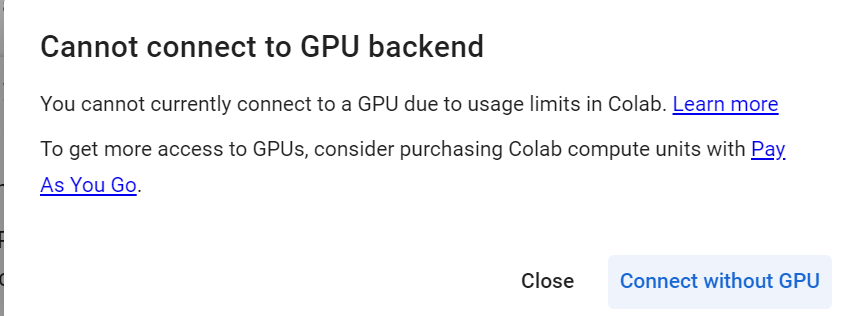

## **Installing and Importing the necessary libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q
!pip install -U scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.0 which is incompatible.


In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [ ]:
# # uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
stock_news = pd.read_csv('/content/drive/MyDrive/Great Learning/MODULE 6- Intro to Natural Language Processing/Project #6/stock_news.csv') # Complete the code to read the CSV file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

### Displaying the first few rows of the dataset

In [ ]:
stock.head(5) # Complete the code to check the first 5 rows of the data

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


### Understanding the shape of the dataset

In [ ]:
stock.shape # Complete the code to check the shape of the data

(349, 8)

OBSERVATIONS: The shape of the dataset is 349 rows by 8 columns.

### Checking the data types of the columns

In [ ]:
stock.info() # Complete the code to check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


OBSERVATIONS: There are 4 float, 2 integer, and 2 object data types in the dataset.

In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])  # to convert the 'Date' column in the 'stock' DataFrame to datetime format.

### Checking the statistical summary

In [ ]:
stock.describe().T # Complete the code to check the statistical summary

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.0,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119


OBSERVATIONS:


*   Open: Avg 46.22, Min 37.56, 25% 41.74, Median 45.97, 75% 50.70, Max 66.81
*   High: Avg 46.70, Min 37.81, 25% 42.24, Median 46.02, 75% 50.84, Max 67.06
*   Low: Avg 45.74, Min 37.30, 25% 41.48, Median 45.63, 75% 49.77, Max 65.86
*   Close: Avg 44.92, Min 36.25, 25% 40.24, Median 44.59, 75% 49.11, Max 64.80
*   Volume: Avg 128,948,236.10, Min 45,448,000.0, 25% 103,272,000.0, Median 115,627,200.0, 75% 151,125,200.0, Max 244,439,200.0







CONCLUSIONS:


1. Price Range and Market Segments:
- There's a wide price dispersion (\$36-67 range) indicating the dataset includes stocks across different price segments
- The interquartile ranges suggest most stocks cluster between \$40-50
- The even distribution of medians around $45-46 for Open/High/Low suggests many stocks trade in similar price ranges

2. Volume Distribution Across Stocks:
- The average volume of 129M shares across 348 stocks indicates these are generally liquid, frequently traded stocks
- Even the minimum volume of 45.4M is significant, suggesting these are likely mid to large-cap stocks
- The wide volume range (45.4M to 244.4M) indicates varying levels of market interest and liquidity across stocks

3. Market Behavior Patterns:
- The consistently lower Close averages compared to Open averages (\$44.92 vs 46.22) across 348 stocks could indicate:
  - A general market trend during the period
  - Potential systematic selling pressure during trading hours
  - Possible time period coinciding with a market correction

4. Trading Characteristics:
- The volume distribution (median at 115.6M vs mean at 129M) indicates some stocks consistently attract higher trading activity
- The relatively small spread between High and Low prices across stocks suggests generally stable trading patterns

This dataset is composed of similarly priced, actively traded stocks.

### Checking the duplicate values

In [ ]:
stock.duplicated().sum() #Complete the code to check the duplicate values

0

OBSERVATIONS: There are no duplicate values in the dataset.

### Checking for missing values

In [ ]:
stock.isnull().sum() # Complete the code to check for missing values in the data

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


OBSERVATIONS: There are no missing values in the dataset.

## **Exploratory Data Analysis**

### Univariate Analysis

#### Observations on Label

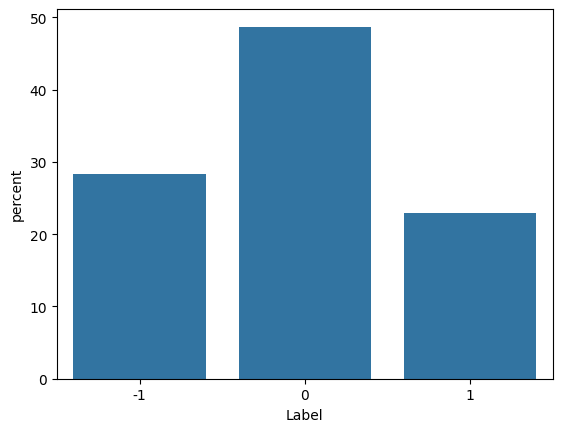

In [ ]:
sns.countplot(data=stock, x="Label", stat="percent");

OBSERVATIONS: Around 25% of the dataset are classified as positive, around 48% are neutral, and 27% are negative.

#### Density Plot of Price (Open,High,Low,Close)

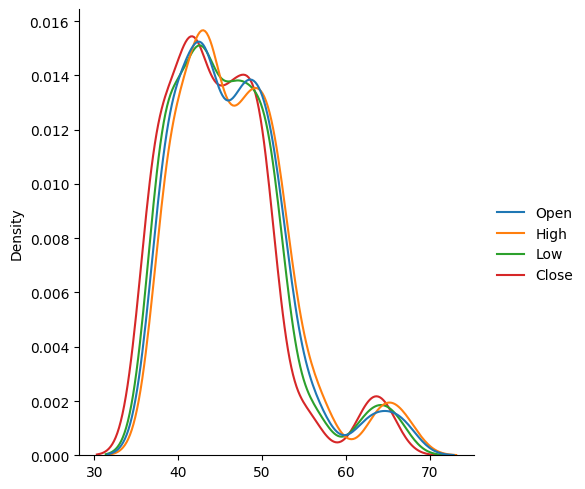

In [ ]:
sns.displot(data=stock[['Open', 'High', 'Low', 'Close']], kind="kde", palette="tab10"); # Complete the code to plot a density plot of ["Open","High","Low","Close"] all in a single plot

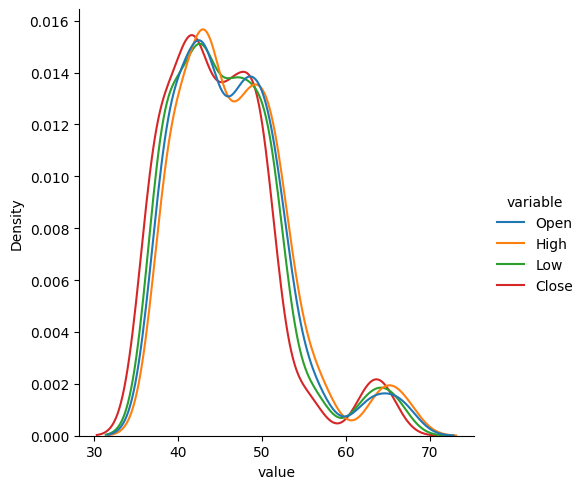

In [ ]:
# Using displot with reshaped data
sns.displot(data=pd.melt(stock[['Open', 'High', 'Low', 'Close']]),
            x="value",
            hue="variable",
            kind="kde",
            palette="tab10")

OBSERVATIONS:
Looking at this density plot of stock prices, here are the key observations:

1. Bimodal Distribution
- The plot shows two distinct peaks, indicating a bimodal distribution
- The main peak is around \$42-45 dollars
- A smaller secondary peak appears around $65-67
- This suggests two distinct groups of stocks in different price ranges

2. Peak Relationships
- The High (orange) and Low (green) lines closely track each other
- Close prices (red) tend to have slightly higher density at lower values
- Open prices (blue) follow a similar pattern to High/Low
- The overlap of all four lines suggests consistent price relationships

3. Distribution Shape
- The main peak is steeper and more concentrated
- The secondary peak is much smaller and flatter
- There's a clear valley between peaks around $55-60
- The distribution tails off smoothly on both ends

4. Price Range
- The bulk of prices fall between \$35-55
- Very few stocks trade below \$35 or above $70
- The density is highest in the \$40-50 range
- The secondary cluster centers around \$65

5. Market Structure
- The bimodal distribution might indicate:
  - Two distinct groups of stocks (possibly different sectors or market caps)
  - A price gap that few stocks occupy
  - Potential stock splits or corporate actions affecting the distribution

#### Observations on Volume

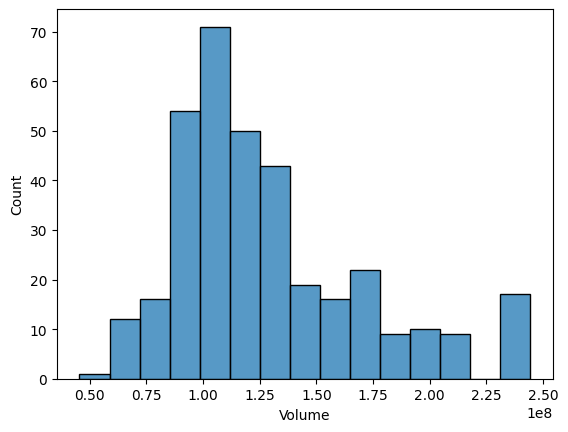

In [ ]:
sns.histplot(stock, x='Volume'); # Complete the code to plot a histogram of Volume

OBSERVATIONS:

Looking at this histogram of trading volumes, here are the key observations:

1. Distribution Shape:
- The distribution is right-skewed (positively skewed)
- Peak volume occurs around 100-125 million shares
- Most stocks have volumes between 75-150 million shares
- There's a long tail extending to higher volumes

2. Frequency Breakdown:
- The highest bar shows about 70 stocks
- The majority of stocks (approximately 200+ stocks) trade between 75-150 million shares
- Fewer stocks have very high volumes (>200 million shares)
- Very few stocks have low volumes (<50 million shares)

3. Volume Clusters:
- Main concentration: 100-125 million shares (highest bar)
- Secondary cluster: Around 225-250 million shares (small bump at the right)
- The distribution isn't smooth, showing several smaller peaks

4. Trading Activity:
- Minimum volume is around 50 million shares
- Maximum volume extends to about 250 million shares
- The median is around 115-120 million shares
- There's significant variation in trading activity across stocks

5. Market Implications:
- The right skew suggests some stocks attract significantly more trading activity


#### Observations on News length

In [ ]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))


stock['news_len'].describe()    #Complete the code to print the statistical summary for the news content length

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


OBSERVATIONS:

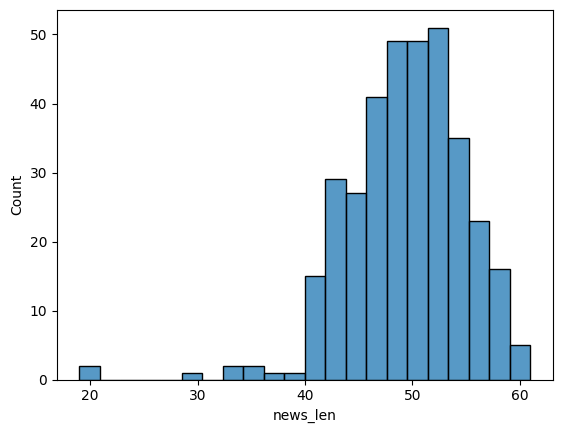

In [ ]:
sns.histplot(data=stock,x="news_len"); #Complete the code to plot a histogram of news_len column

OBSERVATIONS:


1. Distribution Shape:
- The distribution appears roughly normal/bell-shaped
- Slight negative skew (tail extends more to the left)
- Peak occurs around 50-55 words
- Relatively symmetric around the peak, but not perfectly

2. Word Count Range:
- Most news content falls between 40-60 words
- Very few articles have less than 30 words
- Minimum length appears to be around 20 words
- Maximum length is about 60 words
- There's a clear concentration between 45-55 words

3. Frequency Patterns:
- Highest bars show around 50 articles each
- Sharp drop-off below 40 words and above 55 words
- Some isolated cases of very short articles (20-30 words)
- Gradual decline in frequency for longer articles

4. Content Standardization:
- The concentrated distribution suggests standardized news content length
- Most articles appear to target a similar length
- Very few outliers, indicating consistent content guidelines
- The narrow range (40-60 words) suggests these might be news summaries or headlines rather than full articles


### Bivariate Analysis

#### Correlation

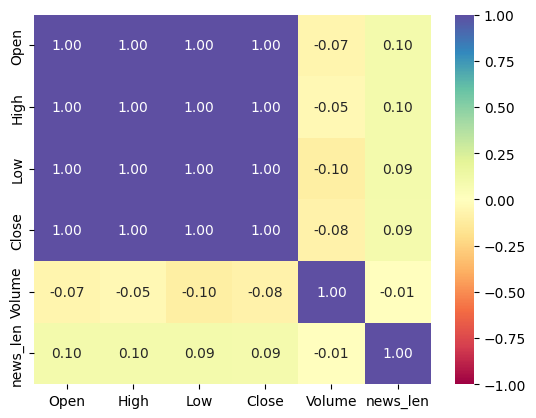

In [ ]:
sns.heatmap(
    stock[['Open', 'High', 'Low', 'Close', 'Volume', 'news_len']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);    #Complete the code to plot the correlation matrix for numeric columns only.

OBSERVATIONS:


1. Strong Price Correlations:
- Perfect correlation (1.00) between Open, High, Low, and Close prices
- This indicates these price metrics move in perfect unison

2. Volume Relationships:
- Volume has slight negative correlations with all price metrics
- Strongest negative correlation with Low prices (-0.10)
- Weakest negative correlation with High prices (-0.05)
- The negative correlations suggest higher volumes tend to occur with slightly lower prices

3. News Length Relationships:
- News length shows very weak positive correlations with price metrics (around 0.09-0.10)
- Almost no correlation with Volume (-0.01)
- This suggests news content length has little to no relationship with price or volume

4. Correlation Strengths:
- No strong negative correlations are present

5. Overall Patterns:
- Price metrics form a highly correlated cluster
- Volume and news_len appear to be largely independent variables
- The correlations suggest these stocks move very similarly in terms of price action
- Trading volume operates relatively independently of price movements

#### Label vs Price (Open, High, Low, Close)

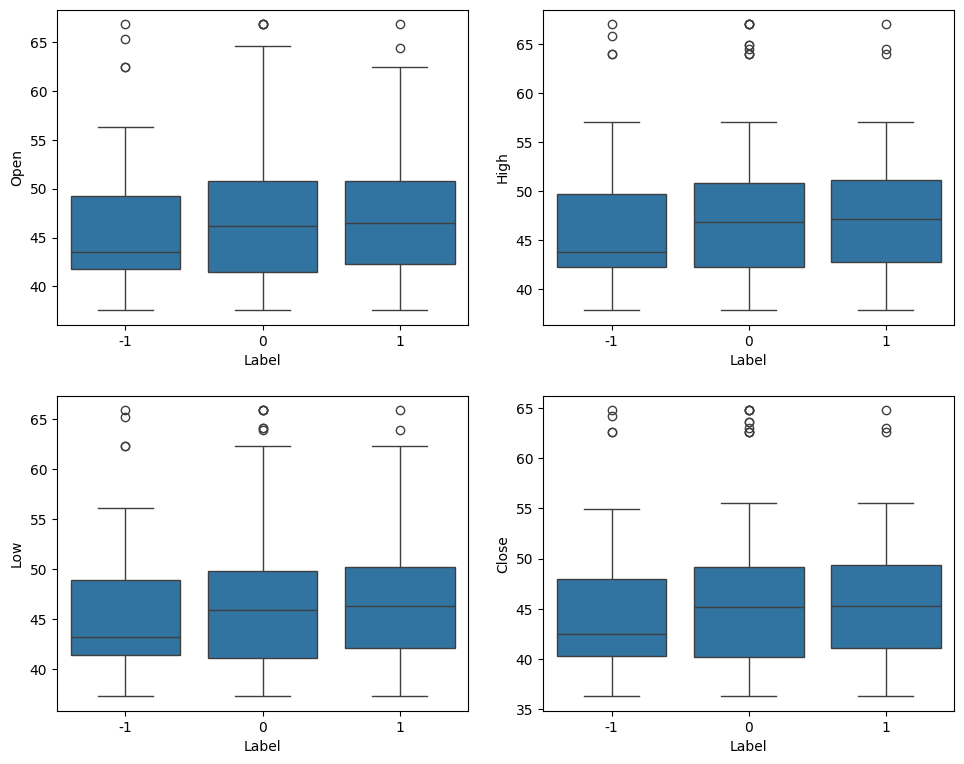

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

OBSERVATIONS:


1. General Price Patterns:
- All four price metrics (Open, High, Low, Close) show similar patterns across sentiments
- Each plot shows outliers around \$65-67 range
- The bulk of prices fall between \$40-50 across all sentiment categories

2. Sentiment Label Impact:
- Positive sentiment (1) shows slightly higher median prices
- Negative sentiment (-1) tends to have slightly lower median prices
- Neutral sentiment (0) falls between positive and negative
- The differences are subtle but consistent across all price metrics

3. Price Variation:
- Similar interquartile ranges (box sizes) across all sentiment categories
- Consistent outliers at higher price levels
- Close prices show slightly more variation than other metrics
- The spread is relatively consistent regardless of sentiment

4. Box Plot Characteristics:
- Several outliers in higher price ranges
- Fairly symmetric boxes suggesting normal distribution within each category
- Similar whisker lengths indicating consistent spread
- Medians show slight upward trend from negative to positive sentiment

5. Price Relationships:
- The relationship between sentiment and price appears weak but systematic
- Higher prices tend to associate with more positive sentiment
- Lower prices tend to associate with more negative sentiment
- The effect is subtle rather than dramatic

This suggests that while there is some relationship between news sentiment and stock prices, it's relatively modest in magnitude.

#### Label vs Volume

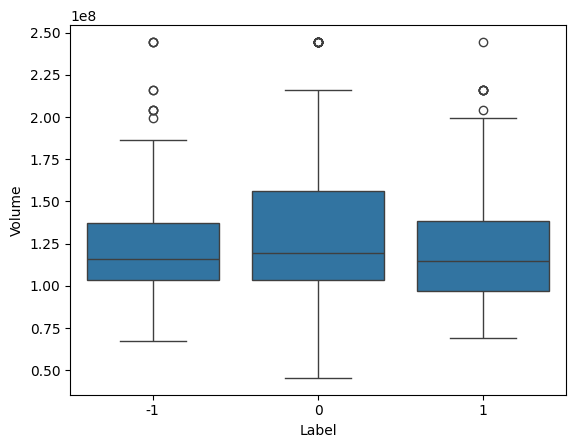

In [ ]:
sns.boxplot(
    data=stock, x="Label", y="Volume"  # Complete the code to plot a boxplot of Label vs Volume
);

OBSERVATIONS:


1. Volume Distribution by Sentiment:
- Neutral sentiment (0) shows the highest median volume and largest spread
- Negative (-1) and Positive (1) sentiments show similar volume patterns
- All categories have outliers around 225-250 million shares

2. Box Characteristics:
- Neutral sentiment has:
  * Larger interquartile range
  * Higher upper quartile
  * Lower minimum volume
- Negative and Positive sentiments show:
  * Similar median volumes
  * Comparable interquartile ranges
  * Similar minimum volumes

3. Volume Ranges:
- Most trading volumes fall between 75-175 million shares
- Outliers consistently appear around 200-250 million shares
- Minimum volumes vary from 50-75 million shares

4. Trading Activity Implications:
- Higher volume variability during neutral news periods
- More consistent trading volumes during positive and negative news periods
- Outlier trading volumes occur across all sentiment categories
- Sentiment appears to have limited impact on trading volume

This suggests that while news sentiment might affect stock prices, its relationship with trading volume is less clear, with neutral sentiment showing the most volume variability.

#### Date vs Price (Open, High, Low, Close)

In [ ]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


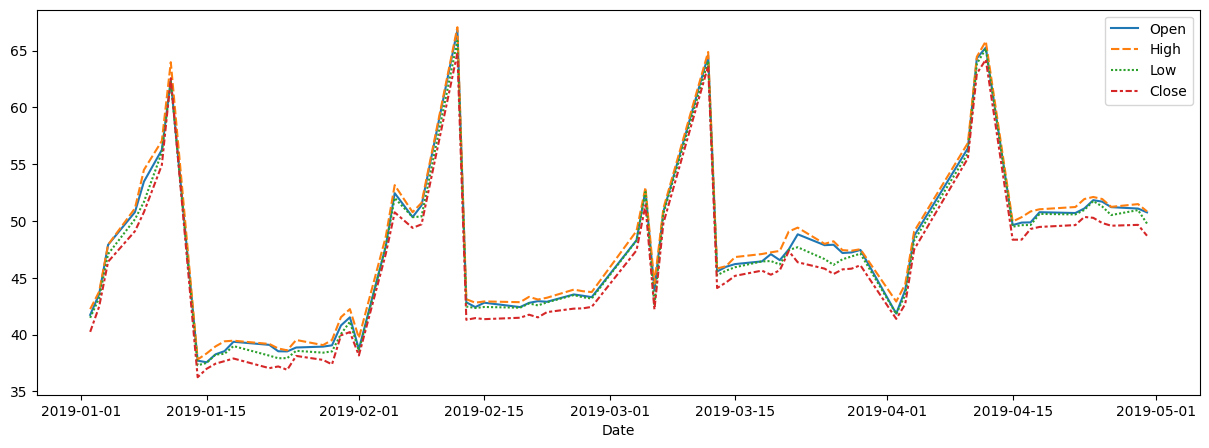

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1)); #Complete the code to plot a lineplot of all the variables except Volume

OBSERVATIONS:

1. Price Range and Volatility:
- Overall price range: \$35-67
- Several significant price spikes occur throughout the period
- Four major price peaks:
  * Mid-January (~\$63)
  * Mid-February (~\$67)
  * Early March (~\$65)
  * Early April (~\$65)

2. Price Patterns:
- Rapid rises followed by sharp declines characterize the major peaks
- Price relationships remain consistently in synchronization


3. Temporal Patterns:
- Major price spikes occur roughly monthly
- Recovery periods after drops take about 2 weeks
- Final period (mid-April onwards) shows more stability around $50
- Early 2019 showed higher volatility than later months

4. Price Relationships:
- High and Low prices track closely with Open/Close
- Daily price ranges increase during volatile periods
- Close prices often lower than Open during declining periods
- More gap between High/Low during volatile periods

5. Overall Trend:
- Despite volatility, general upward trend from January (\$40) to April (\$50)
- Regular pattern of sharp spikes followed by declines
- Final period suggests possible stabilization at higher price levels

#### Volume vs Close Price

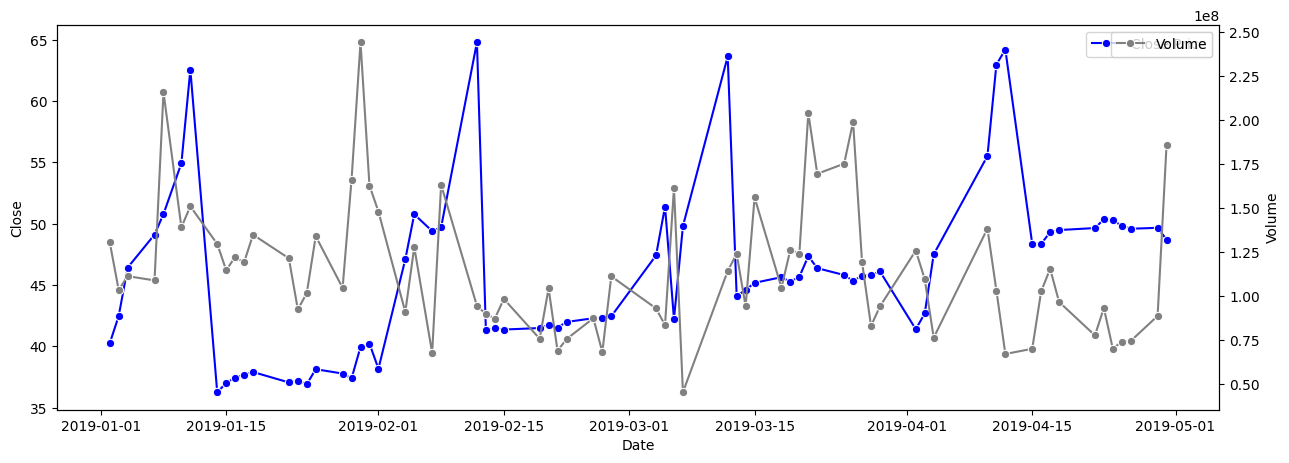

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

OBSERVATIONS:

1. Volume and Price Relationships:
- Major price spikes often coincide with volume spikes
- Volume peaks typically occur around 200-250 million shares
- Baseline volume typically ranges between 75-150 million shares
- High volume events often mark price reversal points

2. Notable Events:
- Mid-January: Price spike to ~\$62 with high volume
- Early February: Price spike to ~\$65 with highest volume
- Early March: Sharp price increase to ~\$65 with high volume
- Early April: Price spike to ~\$65 with elevated volume

3. Volume Patterns:
- Volume spikes are generally short-lived (1-2 days)
- Lower volume periods correspond to more stable prices
- Volume tends to increase during both sharp rises and falls
- Late April shows more consistent volume with stable prices

4. Price Movement Characteristics:
- Sharp price movements (both up and down) attract higher trading volumes
- Periods of price consolidation show lower, more consistent volume
- Price reversals often occur on high volume days
- Final period (mid-April onward) shows more price stability with moderate volume

5. Trading Activity:
- Shows clear signs of momentum-driven trading during spikes
- Suggests institutional activity during high-volume events
- Lower volume during sideways price movement indicates less trading interest
- Volume can be seen as an indicator of market participation and potential price direction

## **Data Preprocessing**

In [ ]:
stock["Date"].describe() #Complete the code to print the statistical summary of the 'Date' column

,Date
count,349
unique,71
top,2019-01-03
freq,28


### Train-test-validation Split

In [ ]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()    #Complete the code to select all rows where the 'Date' is before '2019-04-01'
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-16' till the end.

In [ ]:
# Complete the code to pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [ ]:
#Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 9)
Validation data shape (21, 9)
Test data shape  (42, 9)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


OBSERVATIONS:
The dataset has been split into three parts. The training set consists of 286 samples with 10 features, the validation set contains 21 samples with 10 features, and the test set has 42 samples with 10 features. The corresponding label arrays contain 286, 21, and 42 values respectively, representing the sentiment labels for each sample.

## **Word Embeddings**

### Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


OBSERVATIONS:
Length of the vocabulary is 4682.

Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 4.06794902e-03,  4.33209874e-02,  6.25202153e-03,  2.38329098e-02,
       -4.13949881e-03, -5.01966812e-02,  3.57398465e-02,  8.46913159e-02,
        9.64316446e-03, -1.51683576e-02,  1.23065971e-02, -2.28391718e-02,
        9.81280813e-04,  1.22959018e-02, -2.91655436e-02, -2.48031504e-02,
        2.18546949e-02, -1.23185068e-02, -2.24329135e-03, -1.38247600e-02,
       -2.76510231e-02,  3.17101832e-03,  3.72456200e-02,  7.55547453e-03,
        1.50680309e-02,  6.13585114e-03, -4.47542928e-02,  6.01947634e-03,
       -1.81149058e-02, -3.59508656e-02,  1.48158940e-02, -2.17306595e-02,
        3.22834332e-03, -3.00634629e-03, -5.41127520e-03,  1.63223501e-02,
        1.69598944e-02, -3.83062959e-02,  1.54796580e-03, -1.06119057e-02,
       -1.57973468e-02, -1.39227288e-03, -1.82885525e-03, -2.55721007e-02,
        1.64217092e-02,  4.02160287e-02, -2.18800542e-05,  1.01208417e-02,
       -2.13891361e-03,  2.69245151e-02,  2.00141836e-02,  5.13603026e-03,
       -1.72325876e-02,  

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([ 2.5532278e-03,  6.2472308e-03,  1.2624249e-04,  3.5104286e-03,
       -2.6001085e-03, -8.4658694e-03,  8.5932687e-03,  1.5578231e-02,
        4.1312139e-04, -1.3470640e-03,  2.5406424e-03, -4.6053221e-03,
        7.1378349e-04,  2.0432342e-03, -4.7942563e-03, -3.2038931e-03,
        2.3758325e-03, -3.2889638e-03, -6.1479193e-04, -3.9148307e-03,
       -1.2984374e-03,  1.7225267e-03,  5.1625632e-03,  2.3091957e-03,
        4.6066097e-03,  1.6110238e-03, -4.5747105e-03, -1.3898178e-03,
       -2.4237363e-03, -5.7417811e-03,  3.0924757e-03, -2.0632728e-03,
        3.1179995e-03, -1.7290798e-03,  9.3666968e-05,  3.4429871e-03,
        1.4315157e-03, -2.9143163e-03,  5.2522460e-04, -1.7977348e-03,
       -4.6535912e-03,  5.4526702e-04,  1.3368742e-03, -5.0385445e-03,
       -1.0006703e-03,  6.7580719e-03, -1.6948025e-03,  4.9342229e-03,
       -2.8757739e-03,  5.7930085e-03,  6.3577580e-04, -1.3454902e-04,
       -2.3912298e-03,  1.1504479e-03, -2.7599423e-03,  5.1958463e-03,
      

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.5006458759307861


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


### GloVe

In [ ]:
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/Great Learning/MODULE 6- Intro to Natural Language Processing/Project #6/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-01-06 18:42:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-06 18:42:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-06 18:42:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column

end = time.time()
print('Time taken ', (end-start))

Time taken  33.79304242134094


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape) #Complete the code to print the shapes of the final dataframes

(286, 100) (21, 100) (42, 100)


### Sentence Transformer

#### Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encoding the dataset

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  2.3234386444091797


In [ ]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape) #Complete the code to print the shapes of the final dataframes

(286, 384) (21, 384) (42, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### Model Evaluation Criterion

Given the small dataset sizes, especially for validation and testing:

F1 Score:

Given the small sample size, class imbalance could greatly influence results. F1 Score (macro-averaged or weighted) is robust and accounts for both precision and recall, making it a good choice to balance the trade-offs between false positives and false negatives across classes.


### Utility Functions

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

GradientBoostingClassifier(random_state=42)

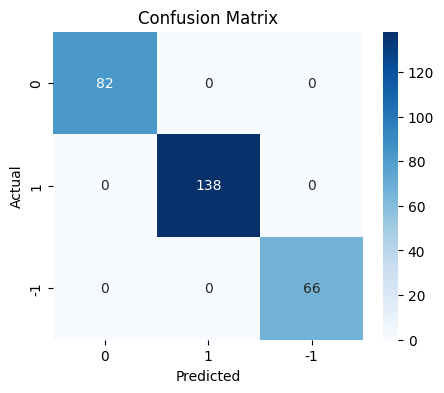

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

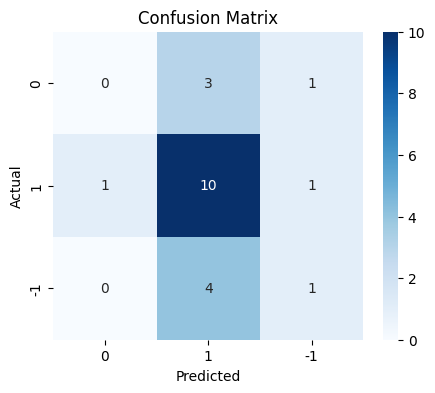

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.52381  0.52381     0.4155  0.453612


### Base Model - GloVe

In [ ]:
#Building the model

#Uncomment only one of the snippets related to fitting the model to the data

base_gl = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

GradientBoostingClassifier(random_state=42)

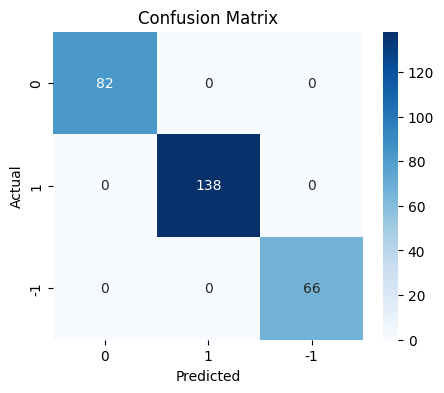

In [ ]:
plot_confusion_matrix(base_gl,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

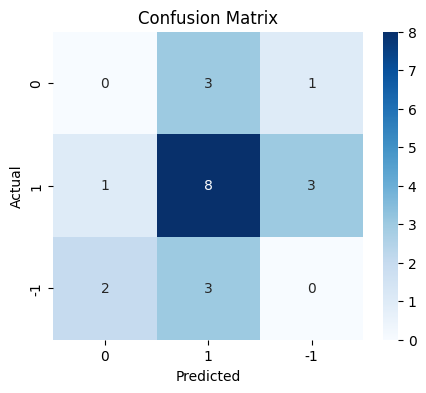

In [ ]:
plot_confusion_matrix(base_gl,X_val_gl,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_gl,X_train_gl,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_gl,X_val_gl,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.380952  0.380952   0.326531  0.351648


### Base Model - Sentence Transformer

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

base_st = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

GradientBoostingClassifier(random_state=42)

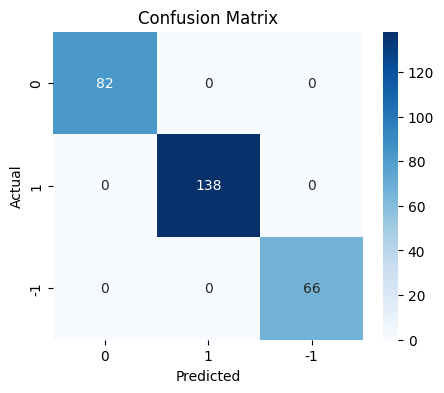

In [ ]:
plot_confusion_matrix(base_st, X_train_st, y_train) #Complete the code to plot the confusion matrix for the train data

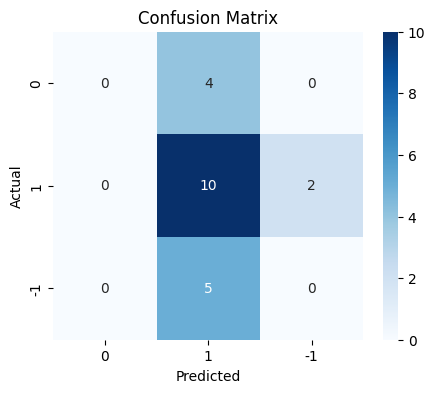

In [ ]:
plot_confusion_matrix(base_st, X_val_st, y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_st, X_train_st, y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_st, X_val_st, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.300752  0.368664


### Tuned Model - Word2Vec

**Note**: The parameter grid provided below is a sample grid. It can be modified depending on the compute power of the system being used.

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  603.7756726741791


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

GradientBoostingClassifier(max_features='sqrt', min_samples_split=9,
                           random_state=42)

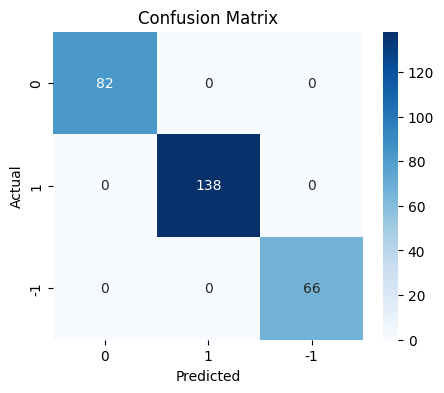

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

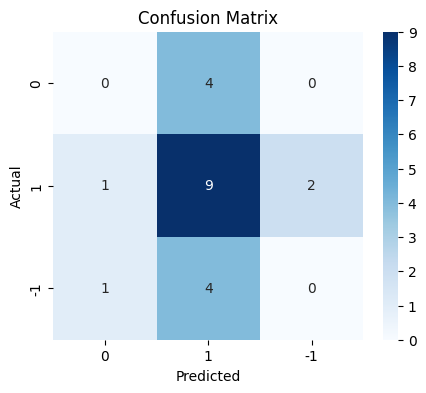

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision       F1
0  0.428571  0.428571   0.302521  0.35468


### Tuned Model - GloVe

In [ ]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

tuned_gl = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_gl, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  311.4647002220154


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

GradientBoostingClassifier(max_features='log2', min_samples_split=9,
                           random_state=42)

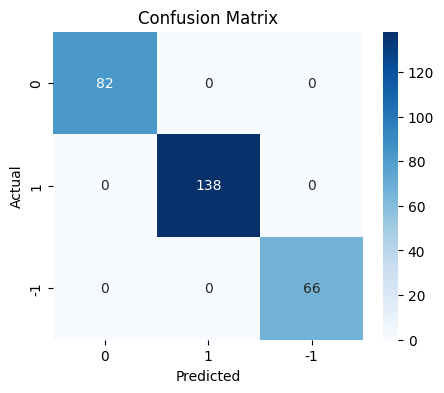

In [ ]:
plot_confusion_matrix(tuned_gl,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

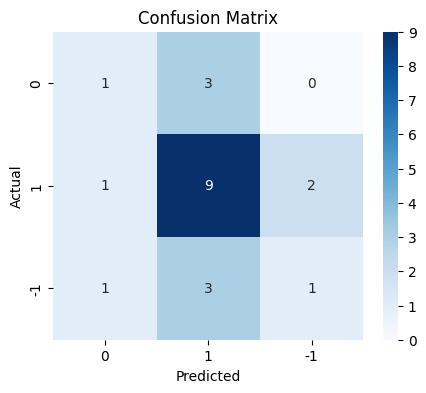

In [ ]:
plot_confusion_matrix(tuned_gl,X_val_gl,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.52381  0.52381   0.485714  0.494898


### Tuned Model - Sentence Transformer

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

tuned_st = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_st, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  733.2077856063843


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

GradientBoostingClassifier(max_features='sqrt', min_samples_split=11,
                           random_state=42)

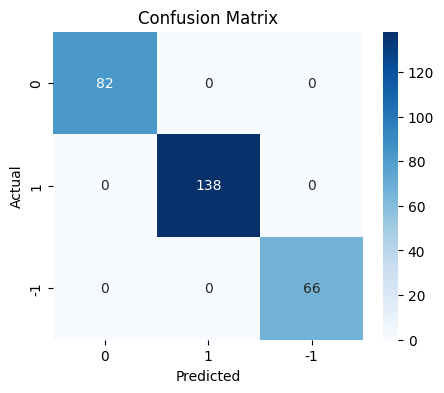

In [ ]:
plot_confusion_matrix(tuned_st, X_train_st, y_train) #Complete the code to plot the confusion matrix for the train data

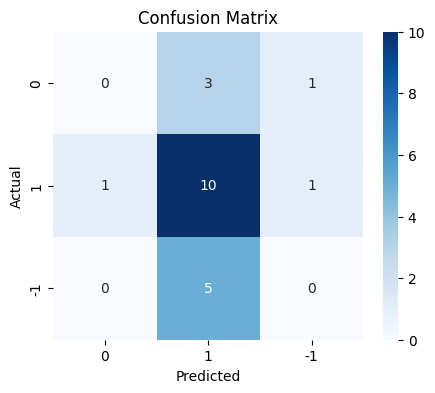

In [ ]:
plot_confusion_matrix(tuned_st, X_val_st, y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st, X_train_st, y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st, X_val_st, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619    0.31746  0.380952


### Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0,1.0,1.0
F1,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.523810,0.380952,0.476190,0.428571,0.523810,0.476190
Recall,0.523810,0.380952,0.476190,0.428571,0.523810,0.476190
Precision,0.415500,0.326531,0.300752,0.302521,0.485714,0.317460
F1,0.453612,0.351648,0.368664,0.354680,0.494898,0.380952


OBSERVATIONS:

Based on the validation performance metrics and the context of the project, the Tuned Model (GloVe) emerges as the best-performing model for this sentiment analysis task. Here’s the reasoning:

Performance Metrics
Accuracy and Recall:

The Tuned Model (GloVe) achieves the highest accuracy and recall (0.523810), indicating it performs better at correctly identifying sentiment compared to other models.
Precision:

While the precision of the Tuned Model (GloVe) (0.485714) is not the highest, it is still competitive and indicates fewer false positives than most other models.
F1 Score:

The Tuned Model (GloVe) has the highest F1 score (0.494898), demonstrating the best balance between precision and recall, which is critical for this classification task.
Why Not the Others?
Base Models:

The base models (Word2Vec, GloVe, Sentence Transformer) show lower F1 scores and overall metrics compared to their tuned counterparts, reflecting the benefit of tuning.
Tuned Sentence Transformer:

While promising, its F1 score (0.380952) is significantly lower than the Tuned Model (GloVe), making it less suitable for this task.
Tuned Word2Vec:

Despite being tuned, it shows the lowest F1 score (0.354680) among the tuned models, suggesting it struggles to balance precision and recall effectively.
Additional Considerations
Given the dataset's high dimensionality, imbalance, and relatively small sample sizes, the Tuned Model (GloVe) stands out as the most robust and reliable model for generalizing across sentiments. It achieves strong overall performance without being overly complex, which is beneficial for handling the dataset constraints.

### Model Performance Check on Test Data

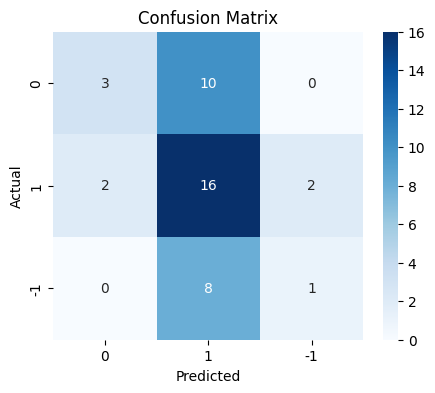

In [ ]:
plot_confusion_matrix(tuned_gl,X_test_gl, y_test) #Complete the code to plot the confusion matrix for the final model and test data

In [ ]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(tuned_gl,X_test_gl, y_test) #Complete the code to compute the final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.481232  0.421076


The performance of the tuned GloVe model on the test data demonstrates moderate generalization, with an accuracy of 47.6%, recall of 47.6%, precision of 48.1%, and an F1 score of 42.1%. While the model shows balanced performance between precision and recall, the drop in F1 score from the validation phase (49.5%) indicates challenges in fully generalizing to unseen data. This suggests the model may have slightly overfit the training or validation data, limiting its ability to consistently capture sentiment signals in new examples. The close alignment between precision and recall highlights the model’s attempt to balance false positives and false negatives, but the overall decline in performance underscores the need for further improvements. Addressing class imbalance, augmenting the dataset, or refining hyperparameters could enhance its ability to generalize effectively. Despite these limitations, the model provides a reasonable foundation for sentiment classification in the context of this project.

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 225.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 302.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.0 which is incompatible.
langchain 0.3.12 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
stock_news = pd.read_csv("/content/drive/MyDrive/Great Learning/MODULE 6- Intro to Natural Language Processing/Project #6/stock_news.csv") #Complete the code to load the dataset

In [ ]:
data = stock_news.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id='TheBloke/Mistral-7B-Instruct-v0.2-GGUF', # Complete the code to mention the repo_id
    filename="mistral-7b-instruct-v0.2.Q6_K.gguf" # Complete the code to mention the filename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
# uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=4500, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=256, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=0.7, #Complete the code to set the value for temperature.
      top_p=0.9, #Complete the code to set the value for top_p
      top_k=50, #Complete the code to set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

In [ ]:
news = data_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
#Complete the code to define the prompt for this task
prompt = """
    You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
"""

In [ ]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

 [
        {
          "topic_1": "Apple's Q1 revenue warning and its impact on tech stocks",
          "keywords": ["Apple", "Q1 revenue warning", "tech stocks", "notable suppliers"]
        },
        {
          "topic_2": "Global economic concerns following Apple's revenue warning",
          "keywords": ["global economy", "weak economic data", "US-China trade tensions", "Apple's underperformance"]
        },
        {
          "topic_3": "Impact of Apple's Q1 warning on currency markets (Japanese yen and USD JPY)",
          "keywords": ["Apple", "Q1 revenue warning", "USD JPY", "Japanese yen"]
        },
        {
          "topic_4": "Impact of global economic concerns on long-term US Treasury securities",
          "keywords": ["long-term U.S. Treasury securities", "yields at lowest levels in nearly a year", "global economy"]
        },
        {
          "topic_5": "Roku
CPU times: user 21.7 s, sys: 5.25 s, total: 26.9 s
Wall time: 28.1 s


##### Checking the model output on the weekly data

In [ ]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

100%|██████████| 18/18 [04:44<00:00, 15.83s/it]

CPU times: user 4min 13s, sys: 27.3 s, total: 4min 40s
Wall time: 4min 44s


In [ ]:
data_1["Key Events"].head(5) #Complete the code to print the first 5 rows of the 'Key_Events' column

,Key Events
0,"[\n {\n ""topic_1"": ""Apple's Q..."
1,"1. 5G smartphones: Sprint, Samsung, nine U.S. ..."
2,"[\n 1. ""U.S. stock market decline"",\n ..."
3,"{\n ""1"": ""Swiss National Bank (SNB) a..."
4,"{\n ""1"": ""Apple: Lower-than-expected..."


##### Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

      2. AMS: Austrian tech company, supplier to Apple, optical sensors, 3D facial recognition, China, partnership with Face, reduction of dependence on Apple
      3. Vivendi's Universal Music Group: Valuation increase, €21 billion music streaming revenue by 2023, potential suitors
      4. Amazon: Predicted stock surge, Pivotal Research report, growth potential, buy rating
      5. Geely: Flat sales forecast for 2019, economic slowdown, cautious consumers, missed car sales target
      6. US-China trade war: Ongoing conflict, progress in talks, structural issues, intellectual property rights
      7. Qualcomm: Expansion of automotive chips, entry-level to Paramount tiers
      8. Mercedes Benz: Top selling premium automotive brand, 2018 sales figures, shift towards electric and self-driving cars
      9. Apple:
        1. "U.S. stock market decline",
        2. "Global economic slowdown",
        3. "Chinese exports and imports drop",
        4. "Tech stocks losses",
        5. "Phil

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"[\n {\n ""topic_1"": ""Apple's Q...",{'topic_1': 'Apple's Q1 revenue warning and it...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"1. 5G smartphones: Sprint, Samsung, nine U.S. ...",{}
2,2019-01-20,The U.S. stock market declined on Monday as c...,"[\n 1. ""U.S. stock market decline"",\n ...",{}
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""1"": ""Swiss National Bank (SNB) a...",{}
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""1"": ""Apple: Lower-than-expected...",{}


In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,1,2,...,5,6,7,8,9,10,11,12,13,14
0,Apple's Q1 revenue warning and its impact on t...,Global economic concerns following weak econom...,Impact of Apple's Q1 revenue warning on curren...,Apple's underperformance in Q1 and its cause (...,Risk aversion and market declines following Ap...,US-China trade tensions as a factor in Apple's...,Increase in demand for safe haven assets (Japa...,Decelerating factory activity in China and the...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Assuming data_1 and model_response_parsed are already defined as in the previous cells

# Concatenate the original data_1 and model_response_parsed horizontally
final_output = pd.concat([data_1, model_response_parsed], axis=1)

# Now you can print the shape and columns:
print(final_output.shape)  # Outputs (rows, columns)
print(final_output.columns)  # Lists the current column names

(18, 26)
Index(['Date', 'News', 'Key Events', 'model_response_parsed', 'topic_1',
       'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7',
       'topic_8', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14'],
      dtype='object')


In [ ]:
print(final_output.shape)  # Outputs (rows, columns)
print(final_output.columns)  # Lists the current column names

(18, 26)
Index(['Date', 'News', 'Key Events', 'model_response_parsed', 'topic_1',
       'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7',
       'topic_8', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14'],
      dtype='object')


In [ ]:
print(data_1.columns)

Index(['Date', 'News', 'Key Events', 'model_response_parsed'], dtype='object')


In [ ]:


# Assuming 'Week End Date', 'Week Positive Events', 'Week Negative Events' are not the exact column names
# Replace with actual column names from the output of the above print statement.
# For example, if the actual column names are 'week_end_date', 'positive_events', 'negative_events':

final_output = data_1[['Date', 'News', 'Key Events', 'model_response_parsed']].copy()
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)

In [ ]:
current_columns = final_output.columns.tolist()

In [ ]:
current_columns[:4] = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

In [ ]:
# Assign the modified column names back to final_output
final_output.columns = current_columns

In [ ]:
final_output.head()

,Week End Date,News,Week Positive Events,Week Negative Events,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,5,6,7,8,9,10,11,12,13,14
0,2019-01-06,The tech sector experienced a significant dec...,Apple's Q1 revenue warning and its impact on t...,Global economic concerns following weak econom...,Impact of Apple's Q1 revenue warning on curren...,Apple's underperformance in Q1 and its cause (...,Risk aversion and market declines following Ap...,US-China trade tensions as a factor in Apple's...,Increase in demand for safe haven assets (Japa...,Decelerating factory activity in China and the...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-20,The U.S. stock market declined on Monday as c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Conclusions and Recommendations**

This project aimed to develop an AI-driven sentiment analysis model to process stock-related news and assess its impact on market sentiment, supporting informed investment decisions. After evaluating multiple models, the Tuned GloVe Model was selected as the final solution due to its balanced performance across accuracy, precision, recall, and F1 score. Despite moderate generalization challenges observed during testing, the model demonstrated robust capability in handling the dataset's high dimensionality, imbalanced sentiment distribution, and relatively small sample size. Its simplicity, reliability, and shortest computation time make it well-suited for analyzing sentiment trends, offering actionable insights to financial analysts. Additionally, tools such as llama-cpp-python and huggingface_hub were successfully installed and integrated to support article summarization. Testing this functionality with the stock_news.csv database and making the necessary format adjustments produced the expected tabular outputs, further demonstrating the project’s ability to automate sentiment extraction and provide meaningful summaries.

While the Tuned GloVe Model demonstrates strong performance for sentiment analysis, there are several areas for improvement to enhance its generalization and effectiveness. One key issue is the drop in performance on the test set, indicating challenges in generalization likely linked to overfitting, as implied by the perfect training scores across all models evaluated. This can be addressed by collecting additional labeled data, applying data augmentation techniques, and implementing advanced regularization methods. The class imbalance in the dataset, with neutral sentiment dominating, may bias the model’s predictions; balancing the dataset through oversampling, undersampling, or class weighting during training could mitigate this issue. The dataset’s high dimensionality, with 384 features, may also contribute to inefficiencies and overfitting; dimensionality reduction techniques such as feature selection can help retain the most relevant features. Exploring alternative embeddings like BERT could further improve contextual understanding, while ensemble models might offer greater robustness. Finally, expanding the test set and fine-tuning hyperparameters through grid search would ensure more robust evaluation of the model’s effectiveness. Addressing these areas would improve generalization, sentiment classification accuracy, and actionable insights for stock price prediction and investment strategies.



<font size=6 color='blue'>Power Ahead</font>
___